In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from sympy import symbols, simplify, lambdify
from sympy.vector import CoordSys3D, matrix_to_vector
from matplotlib import pyplot as plt

from IPython.display import display

In [2]:
class Material:
    def __init__(self, Ms, gamma=5e8, alpha=0.018, Hkeff=6100.0, t=5e-9):
        self.Ms = Ms
        self.gamma = gamma
        self.alpha = alpha
        self.Hkeff = Hkeff
        self.t = t

        
class LayeredFilm:
    def __init__(self, layer1, layer2, J):
        self.l1 = layer1
        self.l2 = layer2
        self.J = J

In [3]:
mu0 = 1.2566370621219e-6

uB_SI = 9.274009994e-24 #J/T
uB_CGS = 9.274009994e-21 #erg/G

hb_SI = 1.054571817e-34 # J*s
hb_CGS = 1.054571817e-27 #erg*s

g0_SI = uB_SI/hb_SI #1/(T*s)
g0_CGS = uB_CGS/hb_CGS #1/(G*s)

layer1 = Material(800., gamma=2.2*g0_CGS, alpha=0.01, t=12e-7, Hkeff=6e6)
layer2 = Material(800., gamma=2.2*g0_CGS, alpha=0.01, t=12e-7, Hkeff=6e6)
film_inst = LayeredFilm(layer1, layer2, 3.6) #J=-3.6 erg/cm^2
H_val = 4.6e3
phi_val = np.deg2rad(63.0)

In [82]:
class StacionaryState:
    def __init__(self):
        S = CoordSys3D('S')
        
        M1, M2, H = symbols("M1 M2 H")
        tet1, tet2, phi = symbols("theta1 theta2 phi")
        Ku1, Ku2, J = symbols("K_u1 K_u2 J")
        t1, t2 = symbols("t1 t2")
        Ev1 = \
            -H*M1*sym.cos(phi - tet1) + \
            2*sym.pi*(M1**2)*(sym.cos(tet1)**2) + \
            Ku1*(sym.sin(tet1)**2)
        
        Ev2 = \
            -H*M2*sym.cos(tet2 - phi) + \
            2*sym.pi*(M2**2)*(sym.cos(tet2)**2) + \
            Ku2*(sym.sin(tet2)**2)
        
        self.Es = J*sym.cos(tet2 - tet1) + t1*Ev1 + t2*Ev2
        
        varset = (
            M1, M2,
            H, phi,
            t1, t2,
            Ku1, Ku2, J,
            tet1, tet2
        )
        self.Es_lamb = lambdify(varset, self.Es, 'numpy')
    
    def get_stationary_angles(
        self, 
        M1, M2,
        H, phi,
        film,
        N = 1000
    ):
        ang1 = np.linspace(0, np.pi, N)
        ang2 = np.linspace(0, np.pi, N)
        
        Es_val = np.zeros((N, N))
        for i in range(len(ang1)):
            Es_val[i] = self.Es_lamb(
                M1, M2,
                H, phi, 
                film.l1.t, film.l2.t,
                film.l1.Hkeff, film.l2.Hkeff, film.J,
                ang1[i], ang2
            )
        
        ind = np.unravel_index(Es_val.argmin(), Es_val.shape)
        
        res = []
        for p in np.where(Es_val==Es_val[ind[0]][ind[1]]):
            res.append([ang1[p[0]], ang2[p[1]]])
        
        return np.array(res)
    
    def plot_energy(
        self, 
        M1, M2,
        H, phi,
        film,
        N = 1000
    ):  
        ang1 = np.linspace(0, np.pi, N)
        ang2 = np.linspace(0, np.pi, N)
        
        Es_val = np.zeros((N, N))
        for i in range(len(ang1)):
            Es_val[i] = self.Es_lamb(
                M1, M2,
                H, phi, 
                film.l1.t, film.l2.t,
                film.l1.Hkeff, film.l2.Hkeff, film.J,
                ang1[i], ang2
            )
        fig, ax = plt.subplots()
        ax.imshow(Es_val)
        fig.tight_layout()
        
        ticks = np.arange(0, N + 1, N//5)
        ticks[-1]-=1
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        
        ax.set_xticklabels(np.linspace(0, 180., 6))
        ax.set_yticklabels(np.linspace(0, 180., 6))

st_state = StacionaryState()
        
        

In [83]:
np.rad2deg(
    st_state.get_stationary_angles(
        film_inst.l1.Ms, film_inst.l2.Ms,
        H_val, phi_val,
        film_inst
    )
)

array([[ 12.61261261, 150.99099099],
       [150.99099099,  12.61261261]])

<IPython.core.display.Javascript object>


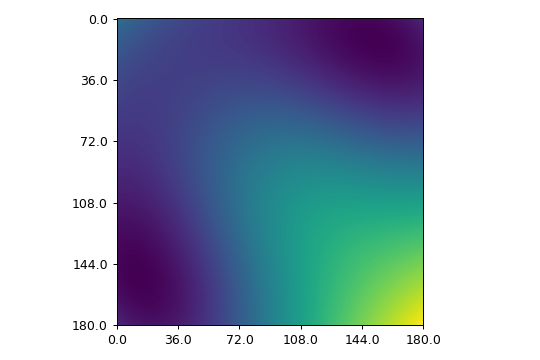

In [80]:
%matplotlib notebook

st_state.plot_energy(
    film_inst.l1.Ms, film_inst.l2.Ms,
    H_val, phi_val,
    film_inst
)

In [47]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

np.arange(len(farmers))

array([0, 1, 2, 3, 4, 5, 6])